In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install selenium
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime
import selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 27.0 MB/s eta 0:00:00


In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

In [3]:
df=pd.read_csv("/kaggle/input/bolsaa/Datos histricos BOLSAA.csv")
df.sort_values(by="Fecha",inplace=True)
df.head()

,Fecha,Cierre,Apertura,Máximo,Mínimo,Vol.,% var.
19,02.03.2023,36.22,36.17,36.35,35.78,1.02M,0.58%
18,03.03.2023,36.03,36.34,36.98,35.90,1.12M,-0.52%
17,06.03.2023,36.30,36.29,36.79,36.14,757.87K,0.75%
16,07.03.2023,36.12,36.11,36.57,35.60,1.41M,-0.50%
15,08.03.2023,36.66,36.89,36.89,35.80,1.54M,1.50%


<AxesSubplot:xlabel='Fecha', ylabel='Cierre'>

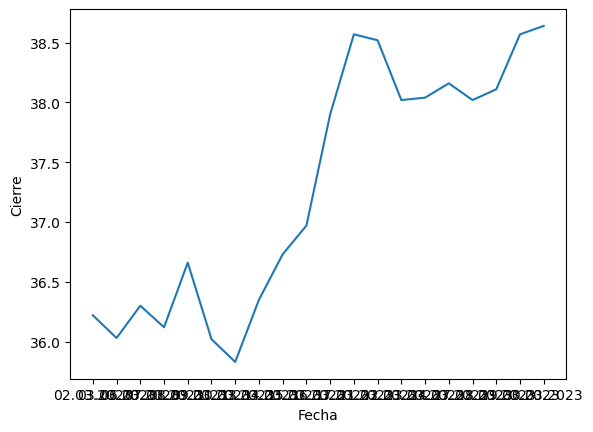

In [4]:
sns.lineplot(data=df,x="Fecha", y="Cierre")


<AxesSubplot:xlabel='Fecha', ylabel='Apertura'>

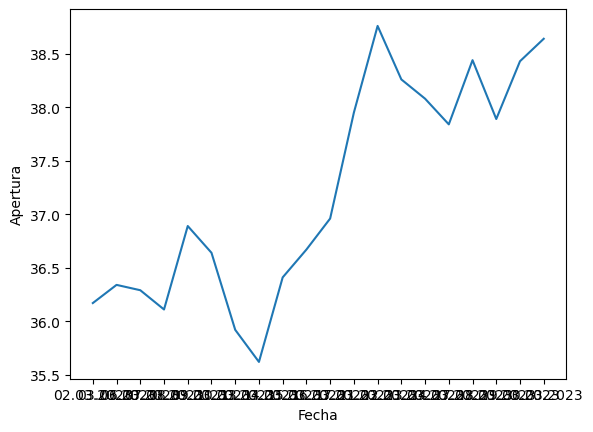

In [5]:
sns.lineplot(data=df,x="Fecha", y="Apertura")

<AxesSubplot:xlabel='Fecha', ylabel='Máximo'>

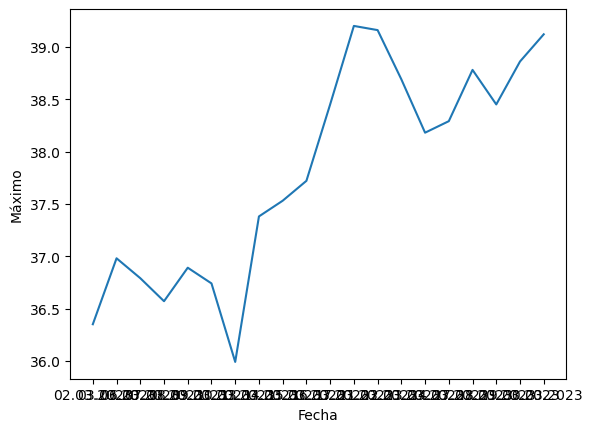

In [6]:
sns.lineplot(data=df,x="Fecha", y="Máximo")

In [7]:
fig = go.Figure(data=[go.Candlestick(x=df['Fecha'],
                open=df['Apertura'],
                high=df['Máximo'],
                low=df['Mínimo'],
                close=df['Cierre'])])

fig.show()

In [8]:
y=df["Cierre"]

In [9]:
columns=df.columns
columns

Index(['Fecha', 'Cierre', 'Apertura', 'Máximo', 'Mínimo', 'Vol.', '% var.'], dtype='object')

In [10]:
x=df[columns]
x.head()

,Fecha,Cierre,Apertura,Máximo,Mínimo,Vol.,% var.
19,02.03.2023,36.22,36.17,36.35,35.78,1.02M,0.58%
18,03.03.2023,36.03,36.34,36.98,35.90,1.12M,-0.52%
17,06.03.2023,36.30,36.29,36.79,36.14,757.87K,0.75%
16,07.03.2023,36.12,36.11,36.57,35.60,1.41M,-0.50%
15,08.03.2023,36.66,36.89,36.89,35.80,1.54M,1.50%
